<a href="https://colab.research.google.com/github/rimshaharmaen/OnlineRetailCustomerSegmentation/blob/main/OnlineRetailSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  ONLINE RETAIL SEGMENTATION



##### **Project Type**    - Unsupervised



##### **Contribution**    - Team
##### **Team Member 1 -RIMSHA HARMAEN**
##### **Team Member 2 -ADEEBA   Khan**


# **Project Summary -**

**Project Summary: Leveraging Data Visualization and Unsupervised Machine Learning for Retail Optimization**

In this  project, we harnessed the power of data visualization and unsupervised machine learning techniques to unlock hidden customer insights. The project's core components included the application of the Recency-Frequency-Monetary (RFM) model, Silhouette Score Method, and Elbow Method. Our comprehensive approach paved the way for strategic decision-making in the retail industry.

**Data Visualization: Communicating Insights Visually**

Data visualization was a cornerstone of this project, allowing us to effectively communicate complex findings:

- **Histograms and Box Plots**: These visualizations provided insights into data distributions, aiding in the understanding of quantities and prices.

- **Bar Plots**: Bar charts vividly displayed customer counts or purchase counts in different categories, such as top products and countries.

- **Line Plots**: Time-series data was brought to life through line plots, making trends and fluctuations evident.

- **Pie Charts**: Pie charts succinctly illustrated revenue distribution among the top countries, offering a high-level view of market performance.

**Unsupervised Machine Learning: Unveiling Customer Segmentation**

The project incorporated unsupervised machine learning techniques to extract valuable customer insights:

- **RFM Model**: Leveraging the RFM model, we categorized customers based on Recency, Frequency, and Monetary value. This segmentation empowered us to identify high-value customers and tailor marketing strategies accordingly.

- **Silhouette Score Method**: We used the Silhouette Score to assess cluster quality, ensuring that customer segments accurately represented their behaviors.

- **Elbow Method**: The Elbow Method aided in determining the optimal number of clusters, striking a balance between granularity and interpretability in customer segmentation.

**Project Impact: Informed Decision-Making**

Through this multifaceted analysis, we uncovered actionable insights:

- **Precise Customer Segmentation**: The application of unsupervised learning allowed for precise customer segmentation, enabling tailored marketing and retention strategies.

- **High-Value Customer Identification**: The RFM model unveiled high-value customers, guiding marketing efforts toward the most profitable segments.

- **Optimal Cluster Count**: The Silhouette Score and Elbow Method ensured the optimal number of clusters, enhancing the granularity and interpretability of customer segmentation.

- **Strategic Marketing**: Armed with a deeper understanding of customer behavior and preferences, the retail business can strategically target and engage customers, ultimately improving customer satisfaction and revenue.

**Conclusion: Empowering Retail Excellence**

This project exemplifies the power of data visualization and advanced analytics in the retail sector. By harnessing data visualization and unsupervised machine learning techniques, we've equipped the retail business with data-driven insights that can drive strategic growth and optimization. The project's success is a testament to the transformative potential of data in empowering informed decision-making and elevating customer experiences in the retail industry.

# **GitHub Link -**

Rimsha Harmaen :-https://github.com/rimshaharmaen/OnlineRetailCustomerSegmentation
Adeeba Khan :-https://github.com/Adeeba27/CP--3--Online-Retail/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import count_nonzero

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Path = '/content/drive/MyDrive/Capstone Project-Online Retail Customer Segmentation/Online Retail.xlsx'
customer_data_df = pd.read_excel(Path)

### Dataset First View

In [ ]:
# Dataset First Look
customer_data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
customer_data_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
customer_data_df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
customer_data_df.duplicated().sum()

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
customer_data_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
customer_data_df.dropna(inplace=True)

In [ ]:
customer_data_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
customer_data_df.columns.values.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [ ]:
# Dataset Describe
customer_data_df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

1. InvoiceNo: A number assigned to each transaction
2. StockCode : Product code
3. Description : Product name
4. Quantity : Number of products purchased for each transaction
5. InvoiceDate : Timestamp for each transaction
6. UnitPrice : Product price per unit
7. CustomerID : Unique identifier each customer
8. Country : Country name





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for description
customer_data_df.nunique()


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting in to date time format
customer_data_df['InvoiceDate'] = pd.to_datetime(customer_data_df['InvoiceDate'], format='%Y-%M-%D %H:%M:%S')

In [ ]:
customer_data_df['Day'] = customer_data_df['InvoiceDate'].dt.day_name()
customer_data_df['Year'] = customer_data_df['InvoiceDate'].apply(lambda x: x.year)

customer_data_df['Monthname'] = customer_data_df['InvoiceDate'].dt.month_name()
customer_data_df['day_number'] = customer_data_df['InvoiceDate'].apply(lambda x: x.day)
customer_data_df['Hour'] = customer_data_df['InvoiceDate'].apply(lambda x: x.hour)
customer_data_df['Minute'] = customer_data_df['InvoiceDate'].apply(lambda x: x.minute)

In [ ]:
# Convert 'InvoiceNo' column to strings
customer_data_df['InvoiceNo'] = customer_data_df['InvoiceNo'].astype(str)

# Remove rows where 'InvoiceNo' starts with 'C'
customer_data_df = customer_data_df[~customer_data_df['InvoiceNo'].str.startswith('C', na=False)]


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart 1 - Top and bottom 5 products ordered

top_5_product = customer_data_df['Description'].value_counts().reset_index()
top_5_product.head()

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
top_5_product.tail()

,index,Description
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


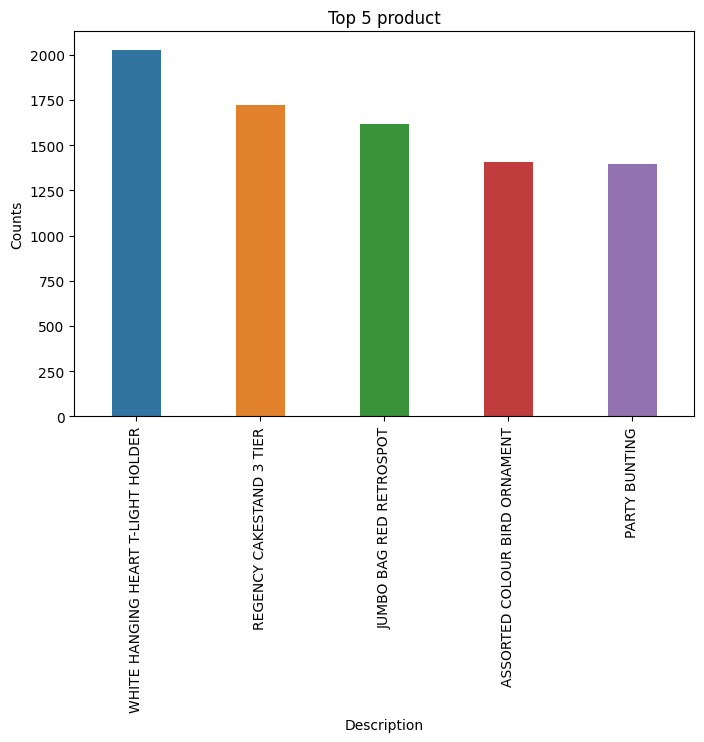

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='index', y='Description', data=top_5_product[ :5], width=0.4)
plt.xticks(rotation='vertical')
plt.title('Top 5 product')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.show()


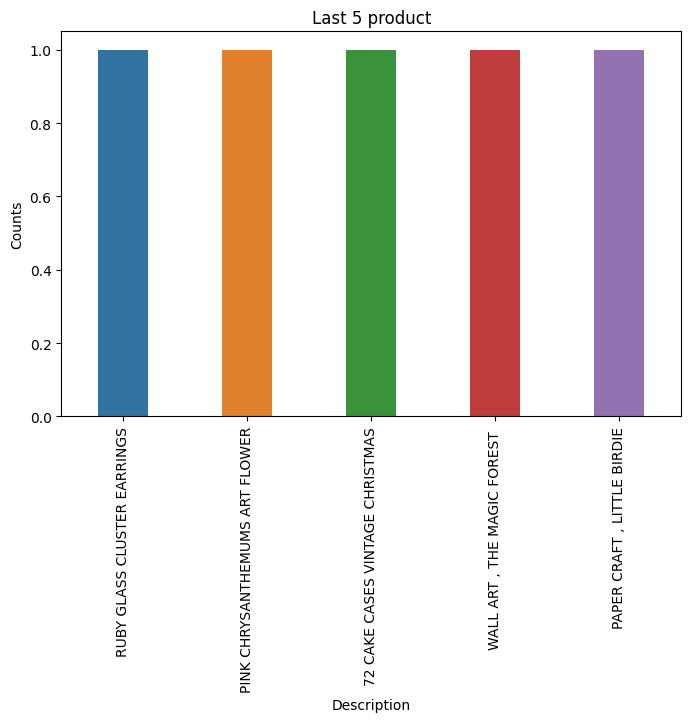

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x='index', y='Description', data=top_5_product[-5: ], width=0.4)
plt.xticks(rotation='vertical')
plt.title('Last 5 product')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?


**Bar Chart is used to view product categories**


##### 2. What is/are the insight(s) found from the chart?

**In the above chart, x axis represents description of the product and y axis represent the counts of the product ordered. From top 5 product, White Hanging Heart T-light holder product has been ordered most by cutomers and from last 5 product, Antique Raspberry Flower Earrings are ordered least with other products.**

#### Chart - 2

In [ ]:
# Chart 2 - Top 5 products according to Quantity

top_5_pro_qty = customer_data_df.groupby('Description')['Quantity'].sum().reset_index()
top_5_pro_qty = top_5_pro_qty.sort_values(by='Quantity',ascending=False ,ignore_index=True)
top_5_pro_qty.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725


In [ ]:
top_5_pro_qty.tail()

,Description,Quantity
3872,BLACK VINT ART DEC CRYSTAL BRACELET,1
3873,FLOWER SHOP DESIGN MUG,1
3874,SET 36 COLOURING PENCILS DOILEY,1
3875,HEN HOUSE W CHICK IN NEST,1
3876,AMBER BERTIE GLASS BEAD BAG CHARM,1


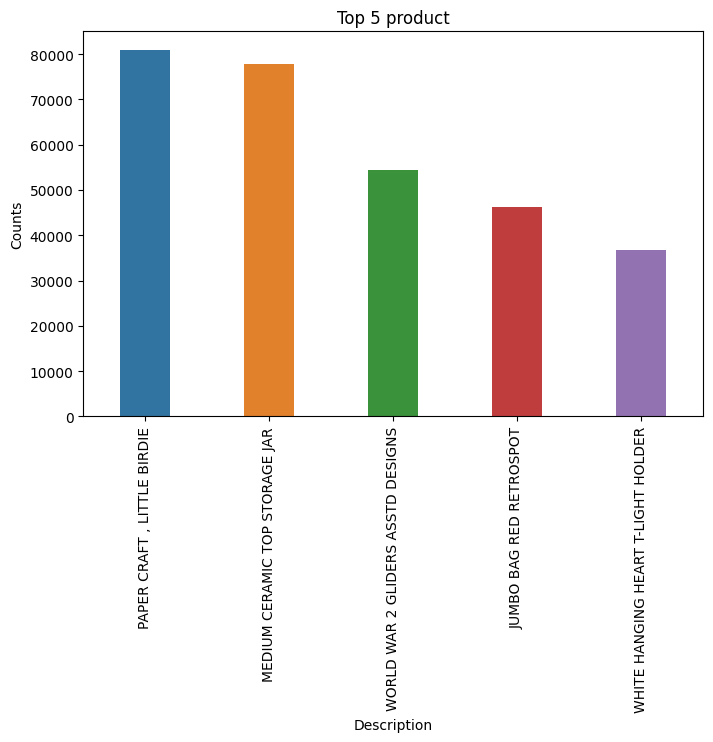

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Description', y='Quantity', data=top_5_pro_qty[ :5], width=0.4)
plt.xticks(rotation='vertical')
plt.title('Top 5 product')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.show()


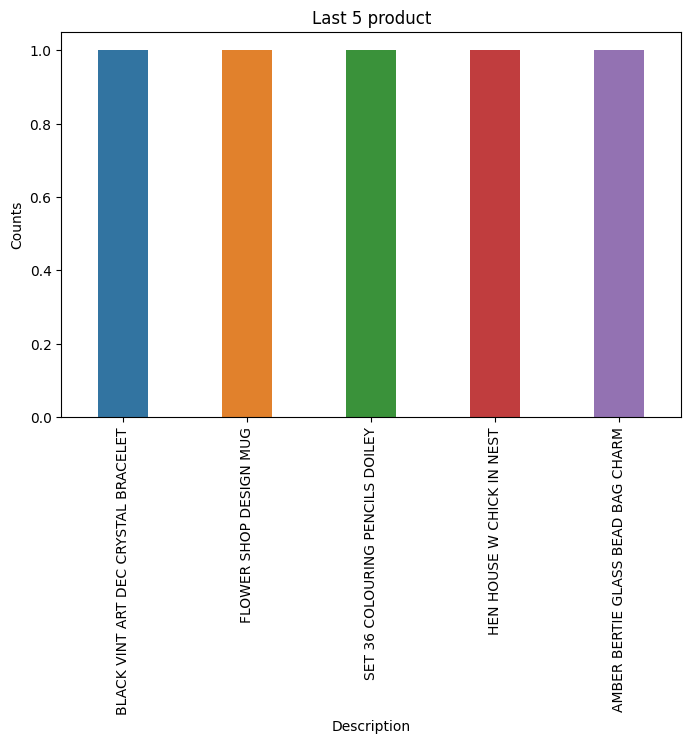

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x='Description', y='Quantity', data=top_5_pro_qty[-5: ], width=0.4)
plt.xticks(rotation='vertical')
plt.title('Last 5 product')
plt.xlabel('Description')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart is used to view product categories sorted by its quantities**

##### 2. What is/are the insight(s) found from the chart?

**In the above chart, x axis represents description of the product and y axis represent the counts of the product ordered. From top 5 product, Paper Craft Little Birdie product has been ordered most by cutomers and from last 5 product, Black Vint Art Dec Crystal Bracelet are ordered least with other products.**

#### Chart - 3

In [ ]:
# Chart 3 - At what hour of the day has orders occurred most ?

def timecategory(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'


In [ ]:
customer_data_df['timecategory'] = customer_data_df['Hour'].apply(timecategory)


<Axes: ylabel='Hour'>

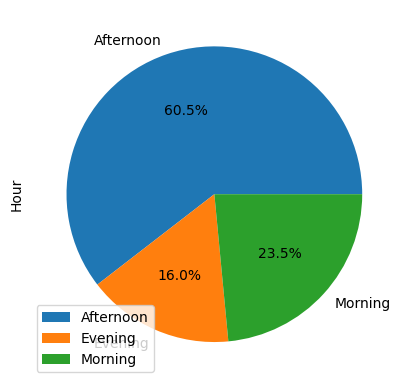

In [ ]:
customer_data_df.groupby(['timecategory']).sum().plot(kind='pie', y='Hour', autopct='%1.1f%%')


##### 1. Why did you pick the specific chart?

**Pie chart is used to show the contribution of three categories in percentage**


##### 2. What is/are the insight(s) found from the chart?

**In the above pie chart, customers order their products mostly in afternoon followed by morning and evening**

#### Chart - 4

In [ ]:
# Chart 4 - Which month recorded highest sales ?

Highest_sales_month = customer_data_df['Monthname'].value_counts().reset_index()
Highest_sales_month

,index,Monthname
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


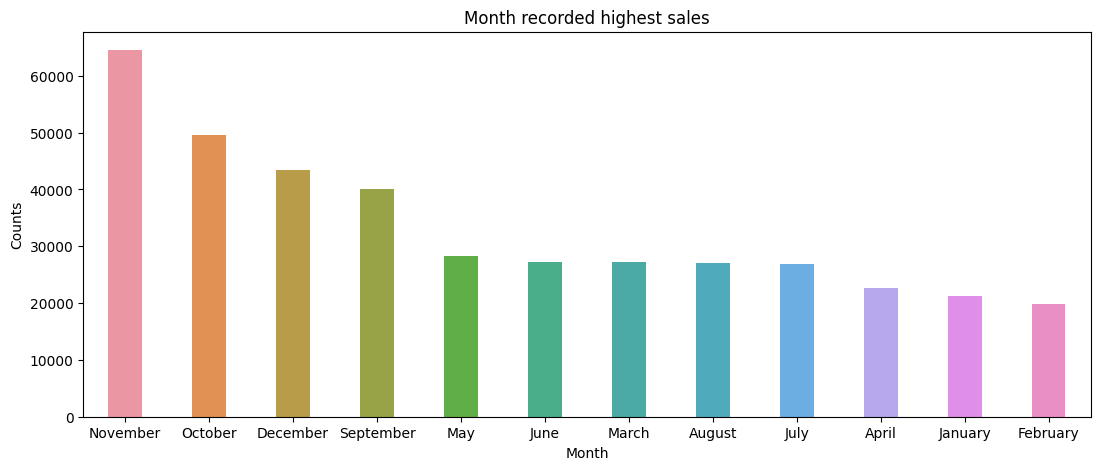

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(x='index', y='Monthname', data=Highest_sales_month, width=0.4)

plt.title('Month recorded highest sales')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.show()



##### 1. Why did you pick the specific chart?

**Bar Chart is used here to view the month which has recorded highest sales**

##### 2. What is/are the insight(s) found from the chart?

**In the above bar chart, x axis represents the month name and y axis represents the counts of the orders. The 4th quarter of the months i.e 'Oct,Nov,Dec' has recorded highest sales followed by September and 1st quarter i.e 'Jan and Feb' has recorded lowest sales.**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
top_countries = customer_data_df['Country'].value_counts().nlargest(10)
total_purchases = customer_data_df['Country'].count()
country_percentages = (top_countries / total_purchases) * 100

country_summary = pd.DataFrame({
    'Country': top_countries.index,
    'Count': top_countries.values,
    'Percentage': country_percentages.values
})

print(country_summary)


          Country   Count  Percentage
0  United Kingdom  354345   89.048411
1         Germany    9042    2.272293
2          France    8342    2.096380
3            EIRE    7238    1.818940
4           Spain    2485    0.624491
5     Netherlands    2363    0.593832
6         Belgium    2031    0.510399
7     Switzerland    1842    0.462902
8        Portugal    1462    0.367407
9       Australia    1185    0.297796


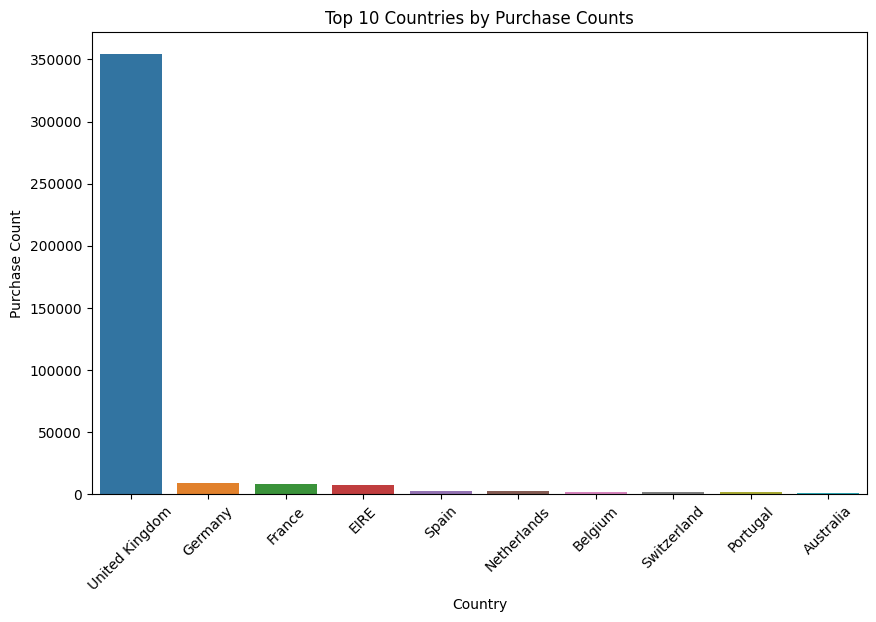

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=country_summary)
plt.title('Top 10 Countries by Purchase Counts')
plt.xlabel('Country')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()


We observe that United kingdom is the country with highest number of purchases

#### Chart - 6

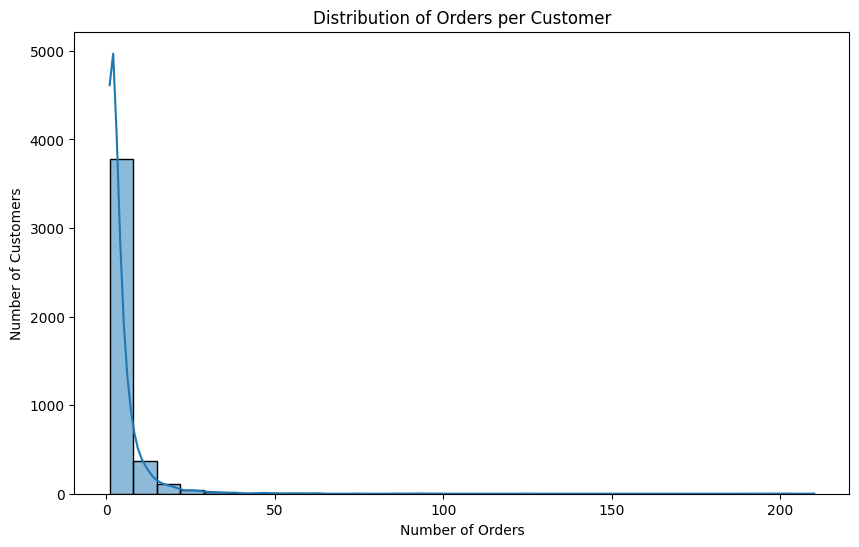

In [ ]:
# Chart - 6 visualization code
orders_per_customer = customer_data_df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

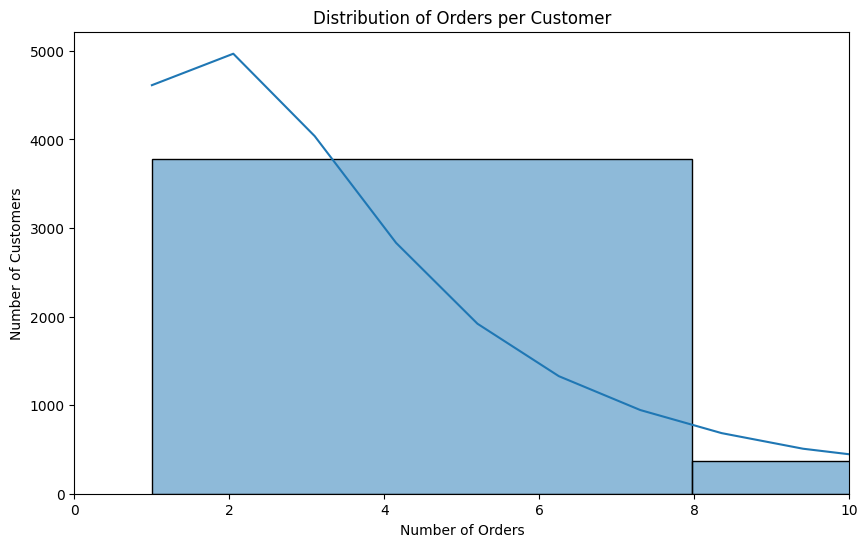

In [ ]:
orders_per_customer = customer_data_df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=30, kde=True)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Set the x-axis limits to focus on a specific range
plt.xlim(0, 10)  # Adjust the limits as needed

plt.show()

we observe that there many customers opt for 2 to 8 orders

#### Chart - 7

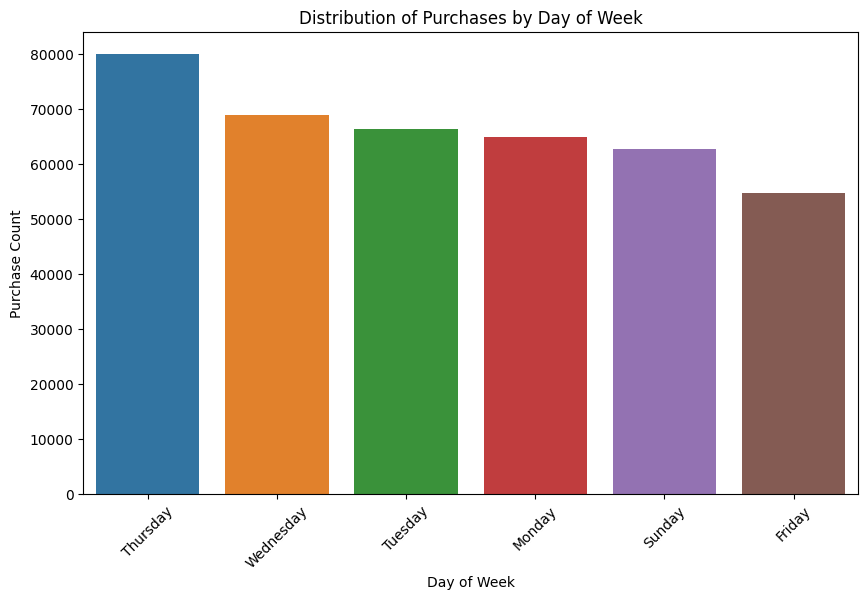

In [ ]:
# Chart - 7 visualization code
customer_data_df['InvoiceDate'] = pd.to_datetime(customer_data_df['InvoiceDate'])
customer_data_df['DayOfWeek'] = customer_data_df['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data_df, x='DayOfWeek', order=customer_data_df['DayOfWeek'].value_counts().index)
plt.title('Distribution of Purchases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()

On Thursday there are highest number of purchases made

#### Chart - 8

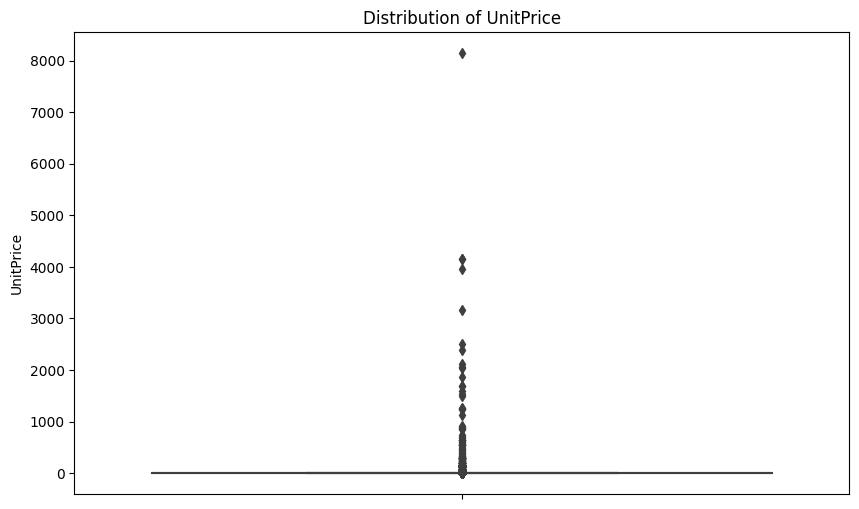

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data_df, y='UnitPrice')
plt.title('Distribution of UnitPrice')
plt.ylabel('UnitPrice')
plt.show()


Many items has unit price from o to 1000 .

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Add a new column for total cost
customer_data_df['TotalCost'] = customer_data_df['Quantity'] * customer_data_df['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data_df.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with highest revenue
highest_revenue = country_revenue.sort_values('TotalCost', ascending=False).head(5)
# Print the top 10 countries with highest revenue
print(highest_revenue)


           Country    TotalCost
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Germany   228867.140
13          France   209024.050


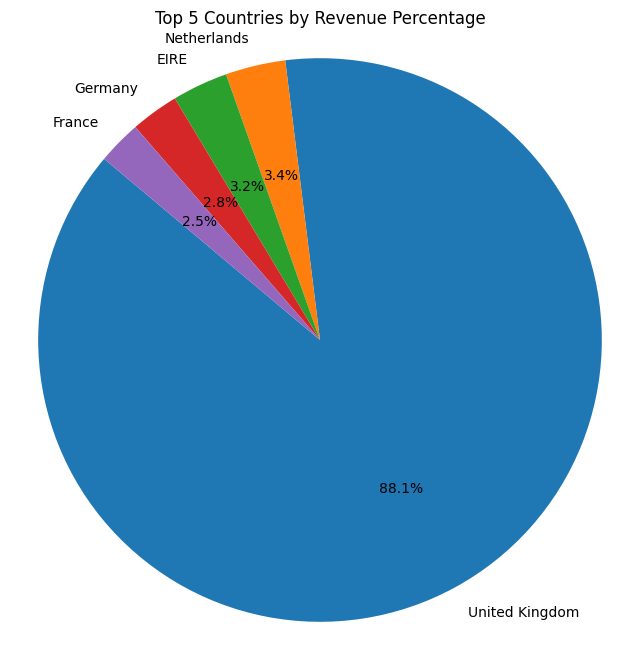

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(highest_revenue['TotalCost'], labels=highest_revenue['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Revenue Percentage')
plt.axis('equal')
plt.show()

United Kingdom is the top country with regard to revenue percentage

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Add a new column for total cost
customer_data_df['TotalCost'] = customer_data_df['Quantity'] * customer_data_df['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data_df.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with lowest revenue
lowest_revenue = country_revenue.sort_values('TotalCost').head(10)
# Print the top 10 countries with highest revenue
print(lowest_revenue)

                 Country  TotalCost
28          Saudi Arabia     145.92
2                Bahrain     548.40
8         Czech Republic     826.74
27                   RSA    1002.31
4                 Brazil    1143.60
11    European Community    1300.25
21             Lithuania    1661.06
20               Lebanon    1693.88
34  United Arab Emirates    1902.28
36           Unspecified    2667.07


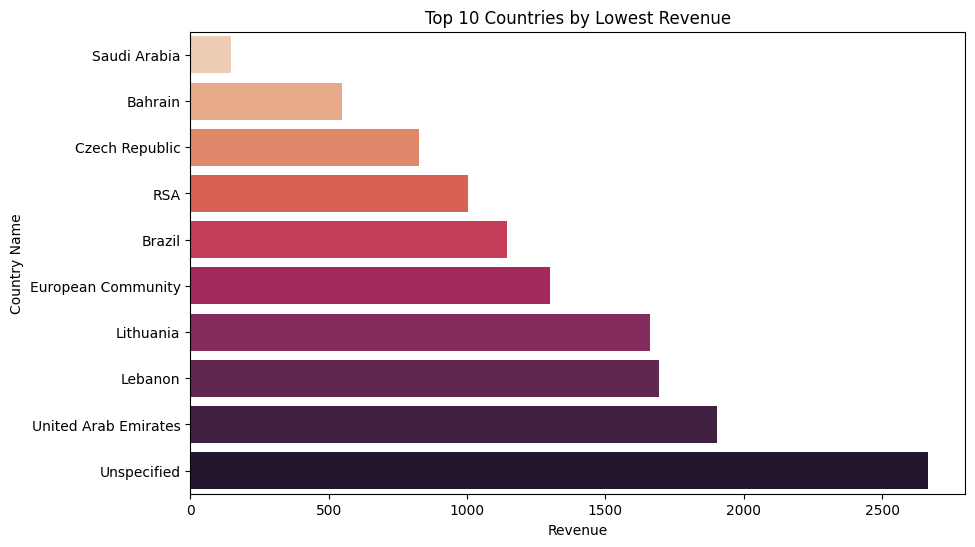

In [ ]:
# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='TotalCost', y='Country', data=lowest_revenue, palette='rocket_r')
# Set the title and axis labels
ax.set_title('Top 10 Countries by Lowest Revenue')
ax.set_xlabel('Revenue')
ax.set_ylabel('Country Name')
# Show the plot
plt.show()

In [ ]:
saudi arabia has lowest revenue percentage

#### Chart - 11

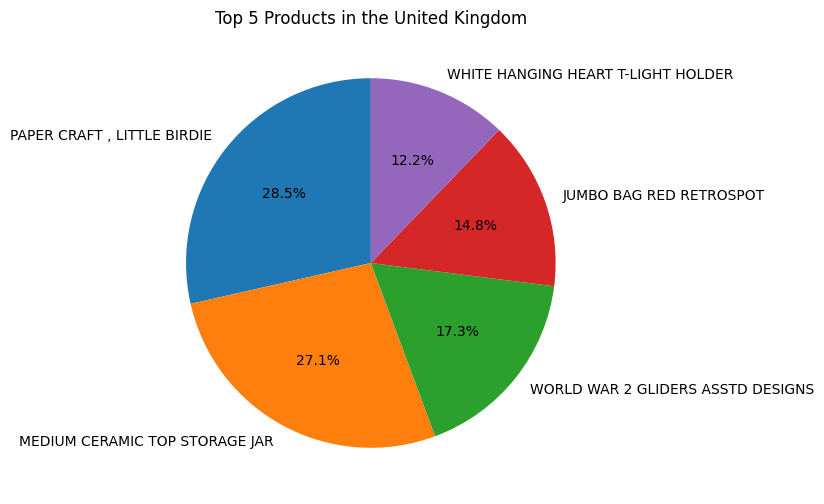

In [ ]:
# Chart - 11 visualization code
# Filter the data for sales in the United Kingdom
uk_sales = customer_data_df[customer_data_df['Country'] == 'United Kingdom']

# Group the data by product description and sum the quantity sold
product_sales = uk_sales.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)

# Create a pie chart with matplotlib
plt.figure(figsize=(8,6))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Top 5 Products in the United Kingdom')

# Show the plot
plt.show()

Paper craft, little birdie are the top items purchased fromt the country United Kingdom

#### Chart - 12

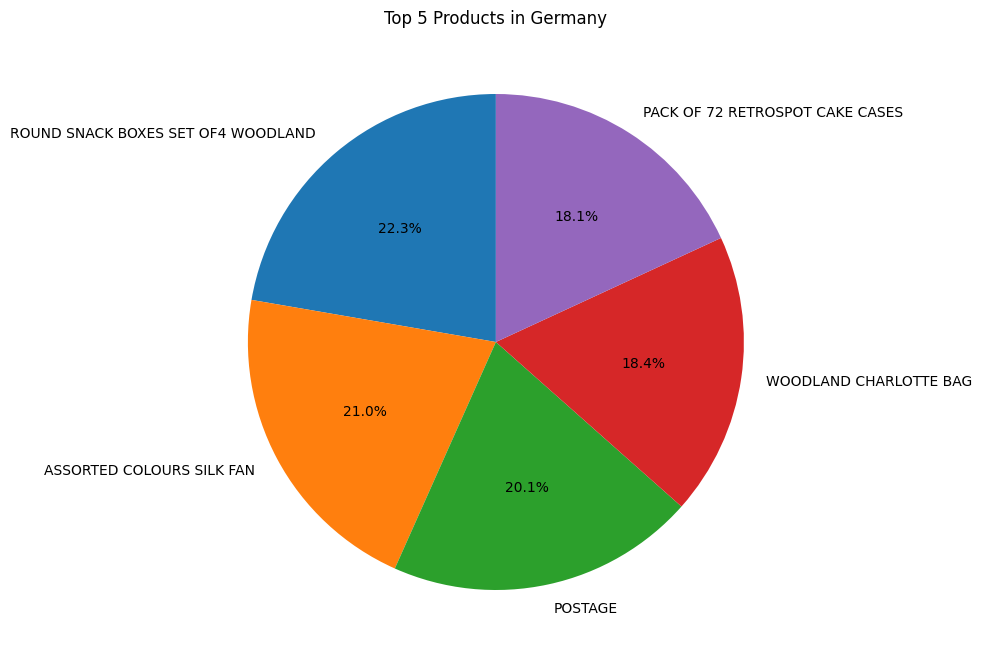

In [ ]:
# Chart - 12 visualization code
# Filter the data for sales in Germany
germany_sales = customer_data_df[customer_data_df['Country'] == 'Germany']
# Group the data by product description and sum the quantity sold
product_sales = germany_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,10))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in Germany')
plt.show()


Round Snack boxes set of 4 woodland are the products purchased highly in germany

#### Chart - 13

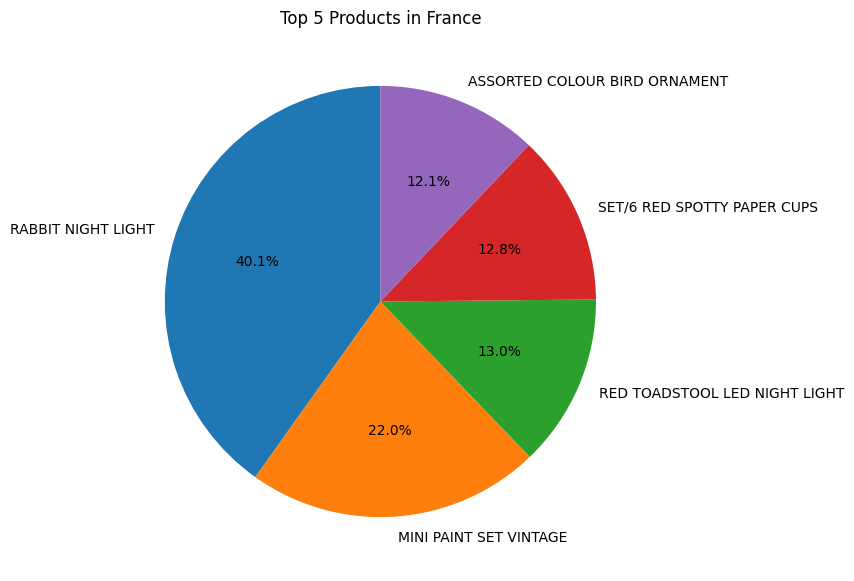

In [ ]:
# Chart - 13 visualization code
# Filter the data for sales in France
France_sales = customer_data_df[customer_data_df['Country'] == 'France']
# Group the data by product description and sum the quantity sold
product_sales = France_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,7))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in France')
plt.show()

Rabbit Night light is the highest purchase percentage item in france

#### Chart - 14 - Correlation Heatmap

<Axes: >

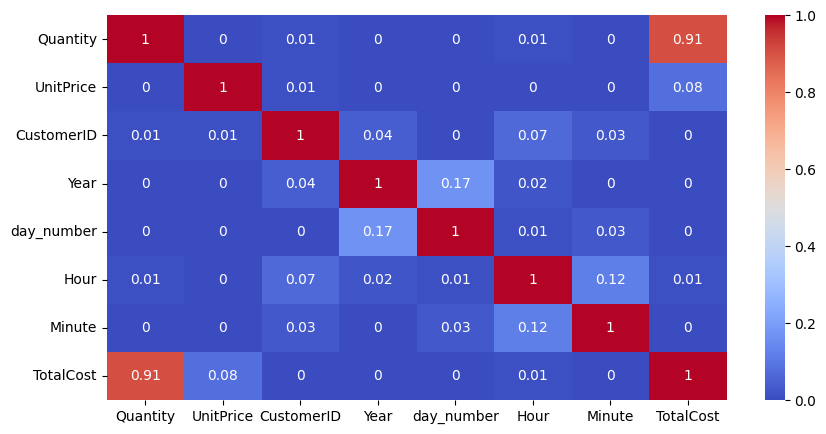

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))

correlation = customer_data_df.corr().round(2)
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## ***6. Feature Engineering & Data Pre-processing***

### **HANDLING OUTLIERS**

<Axes: >

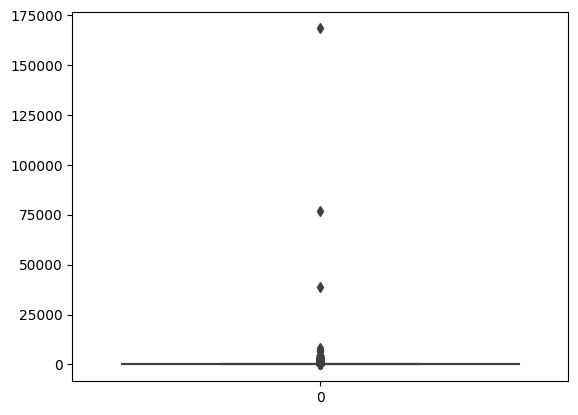

In [ ]:
# Handling Outliers & Outlier treatments

sns.boxplot(customer_data_df['TotalCost'])

In [ ]:
def remove_outliers_iqr(customer_data_df, TotalCost, threshold=1.5):
    Q1 = customer_data_df['TotalCost'].quantile(0.25)
    Q3 = customer_data_df['TotalCost'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    df_no_outliers = customer_data_df[(customer_data_df['TotalCost'] >= lower_bound) & (customer_data_df['TotalCost'] <= upper_bound)]
    return df_no_outliers

# Remove outliers using IQR for column 'A' with a threshold of 1.5
df_no_outliers = remove_outliers_iqr(customer_data_df, 'TotalCost')

print("Original DataFrame:")
print(customer_data_df)
print("\nDataFrame with outliers removed:")
print(df_no_outliers)

Original DataFrame:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID      

### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

REMOVE PUNCTUATIONS

In [ ]:
# Remove Punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
customer_data_df['Description'] = customer_data_df['Description'].apply(remove_punctuation)
customer_data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34


#### Removing URLs & Removing words and digits contain digits.

In [ ]:
import re
# Remove URLs & Remove words and digits contain digits
def remove_urls_and_digits(text):
    # Remove URLs using regex
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Remove words containing digits using regex
    text = re.sub(r'\w*\d\w*', '', text)

    return text

In [ ]:
customer_data_df['Description'] = customer_data_df['Description'].apply(remove_urls_and_digits)
customer_data_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34


#### Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
customer_data_df['Description'] =customer_data_df['Description'].apply(stopwords)
customer_data_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34


#### Tokenization

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

# Tokenize the 'text_column'
customer_data_df['tokenized_text'] = customer_data_df['Description'].apply(lambda x: word_tokenize(x))
customer_data_df.head(2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost,tokenized_text
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30,"[white, hanging, heart, tlight, holder]"
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34,"[white, metal, lantern]"


#### Text Normalization

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
customer_data_df['Description'] = customer_data_df['Description'].apply(stemming)
customer_data_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost,tokenized_text
0,536365,85123A,white hang heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30,"[white, hanging, heart, tlight, holder]"
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34,"[white, metal, lantern]"


#### Part of speech tagging

In [ ]:
# POS Taging
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

customer_data_df['pos_tags'] = customer_data_df['Description'].apply(lambda x: pos_tag(word_tokenize(x)))
customer_data_df.head(2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Year,Monthname,day_number,Hour,Minute,timecategory,DayOfWeek,TotalCost,tokenized_text,pos_tags
0,536365,85123A,white hang heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,15.30,"[white, hanging, heart, tlight, holder]","[(white, JJ), (hang, JJ), (heart, NN), (tlight..."
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,December,1,8,26,Morning,Wednesday,20.34,"[white, metal, lantern]","[(white, JJ), (metal, NN), (lantern, NN)]"


#### Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(customer_data_df)



TfidfVectorizer()

In [ ]:
# Vectorizing Text

# extract the tfid representation matrix of the text data
tfid_matrix = tfidf_vectorizer.transform(customer_data_df['Description'].values.astype('U'))
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [ ]:
df = pd.DataFrame(array)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

calc_vif(customer_data_df[[i for i in customer_data_df.describe().columns if i in ['Description','Quantity','UnitPrice','TotalCost','Country']]])

,variables,VIF
0,Quantity,5.979842
1,UnitPrice,1.044297
2,TotalCost,6.029287


## Data Splitting & Scaling

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

features = list(customer_data_df.columns.drop(['CustomerID', 'day_number','Minute','Hour','StockCode','Description','Country','InvoiceDate','Monthname','DayOfWeek','timecategory','Day','tokenized_text', 'pos_tags']))
target  = 'TotalCost'

X = customer_data_df[features].values
y = customer_data_df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

print("The dimension of X train is {}".format(X_train.shape))
print("The dimension of X test is {}".format(X_test.shape))
print("The dimension of y train is {}".format(y_train.shape))
print("The dimension of y test is {}".format(y_test.shape))

#SCALING
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X train is (278546, 5)
The dimension of X test is (119378, 5)
The dimension of y train is (278546,)
The dimension of y test is (119378,)


## ***7. ML Model Implementation***

### ML Model - 1
## **RFM MODEL**

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_data_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalCost': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalCost': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

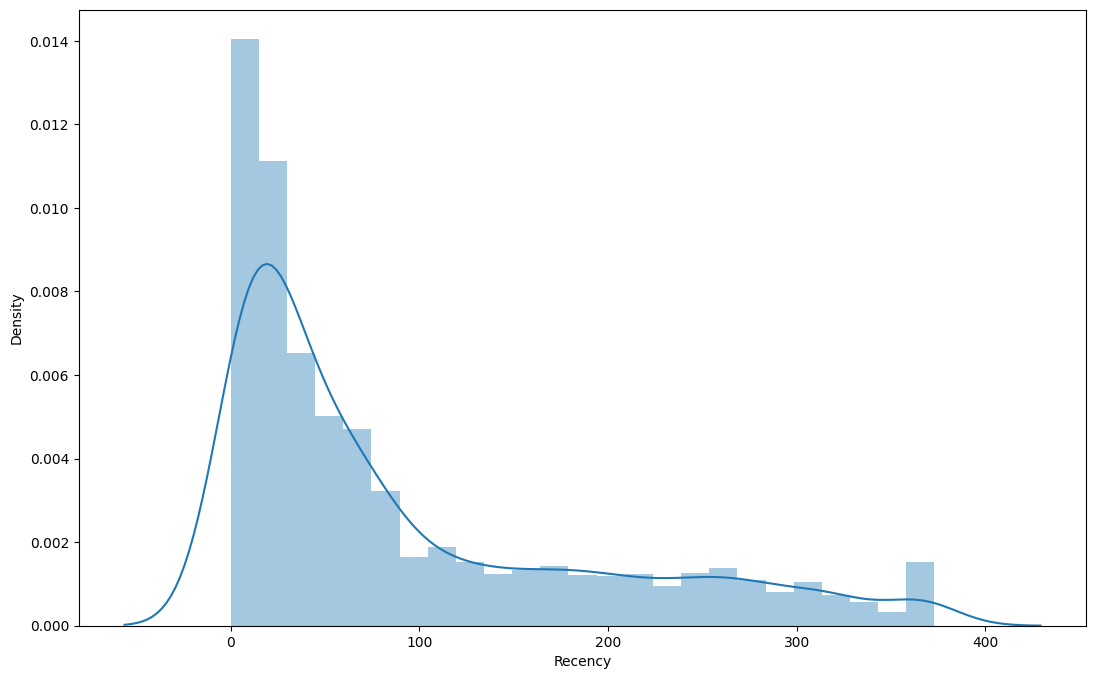

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

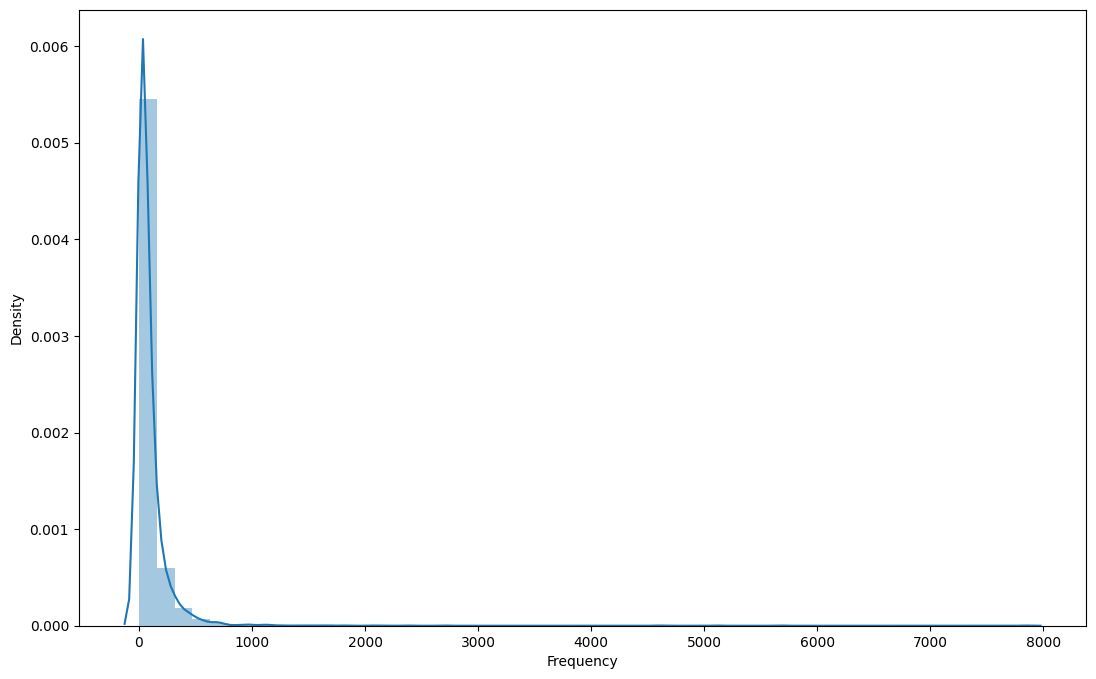

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

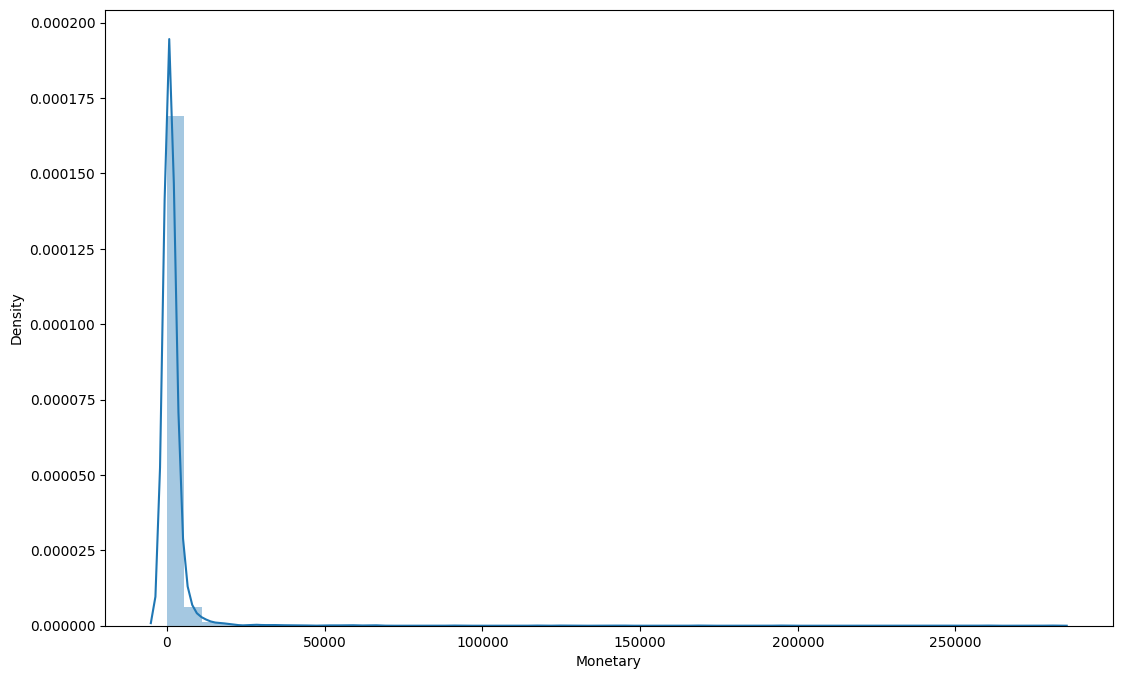

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

### **CREATING RFM SEGMENTS**

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<Axes: xlabel='Recency', ylabel='Density'>

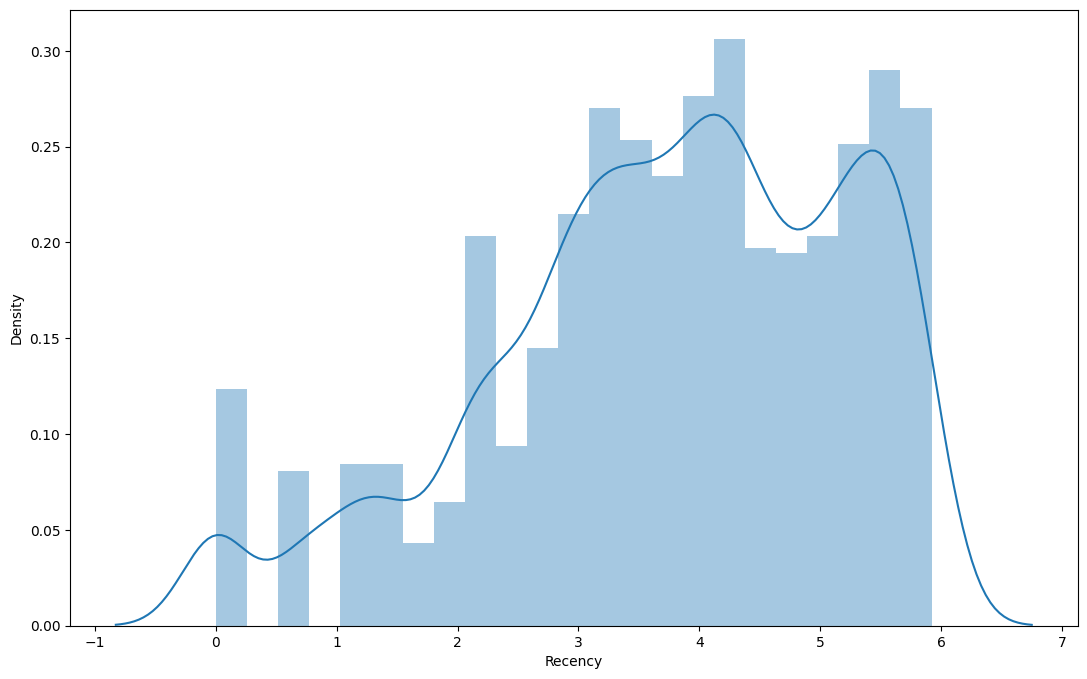

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

<Axes: xlabel='Frequency', ylabel='Density'>

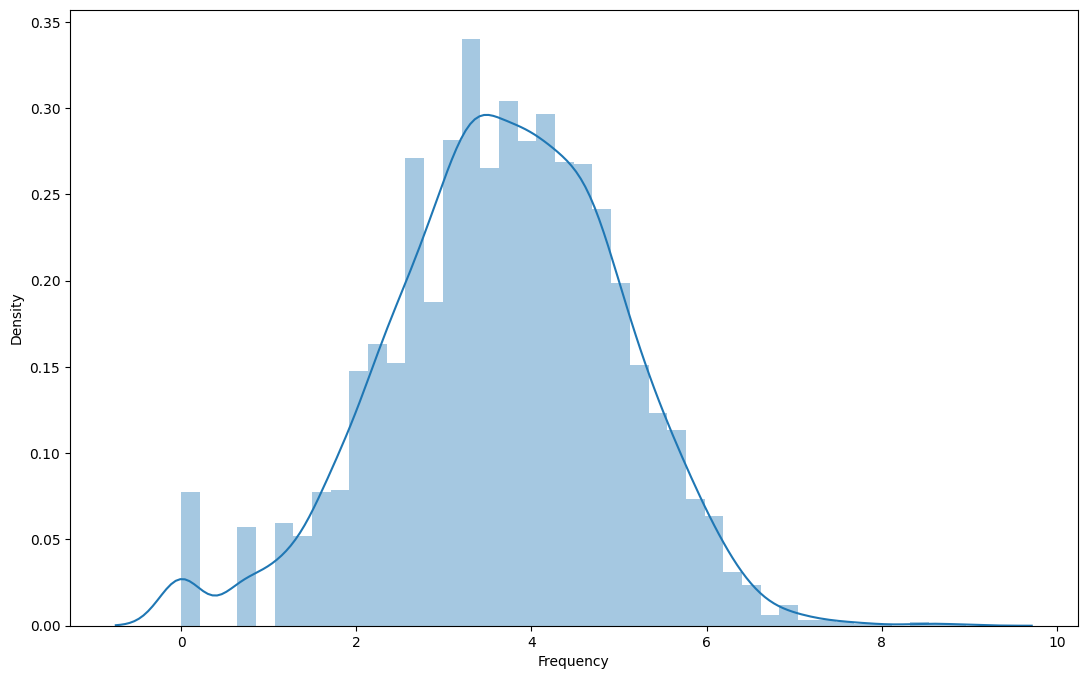

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

<Axes: xlabel='Monetary', ylabel='Density'>

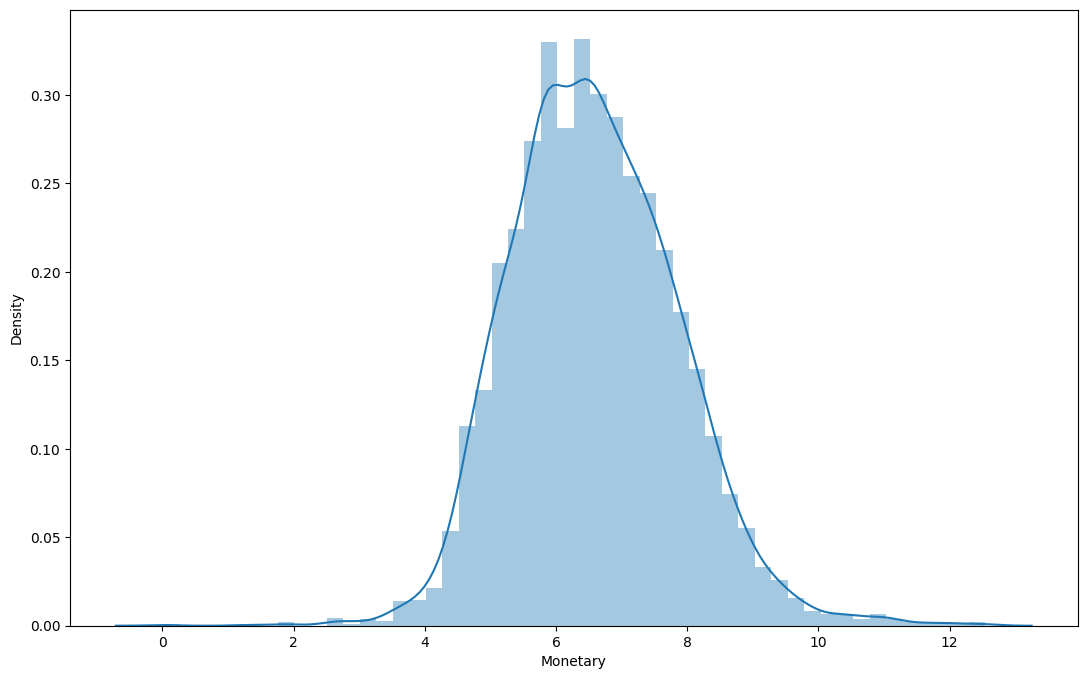

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

### ML MODEL 2
# **SILHOUTTE SCORE METHOD ON RECENCY & MONETARY**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4209015528498786
For n_clusters = 3, silhouette score is 0.34264308259379067
For n_clusters = 4, silhouette score is 0.3645300274267199
For n_clusters = 5, silhouette score is 0.34003760968763097
For n_clusters = 6, silhouette score is 0.34415556292326693
For n_clusters = 7, silhouette score is 0.343983367777398
For n_clusters = 8, silhouette score is 0.3388856609647725
For n_clusters = 9, silhouette score is 0.34667594900826465
For n_clusters = 10, silhouette score is 0.348366146294789
For n_clusters = 11, silhouette score is 0.336760381716993
For n_clusters = 12, silhouette score is 0.3427507415268171
For n_clusters = 13, silhouette score is 0.34023172030980414
For n_clusters = 14, silhouette score is 0.34156115048020164
For n_clusters = 15, silhouette score is 0.34471340706788983


# ML MODEL 3
#**ELBOW METHOD ON RECENCY AND MONETARY**

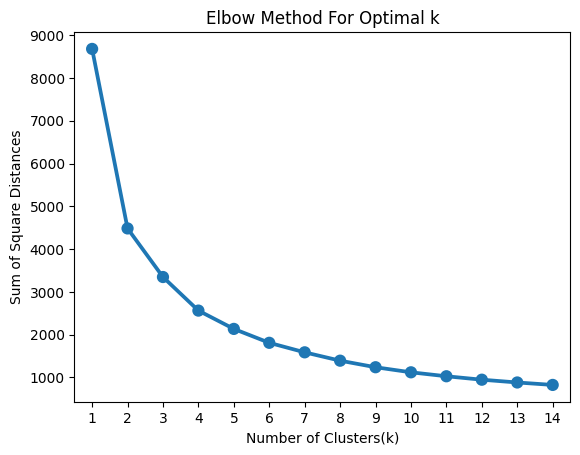

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

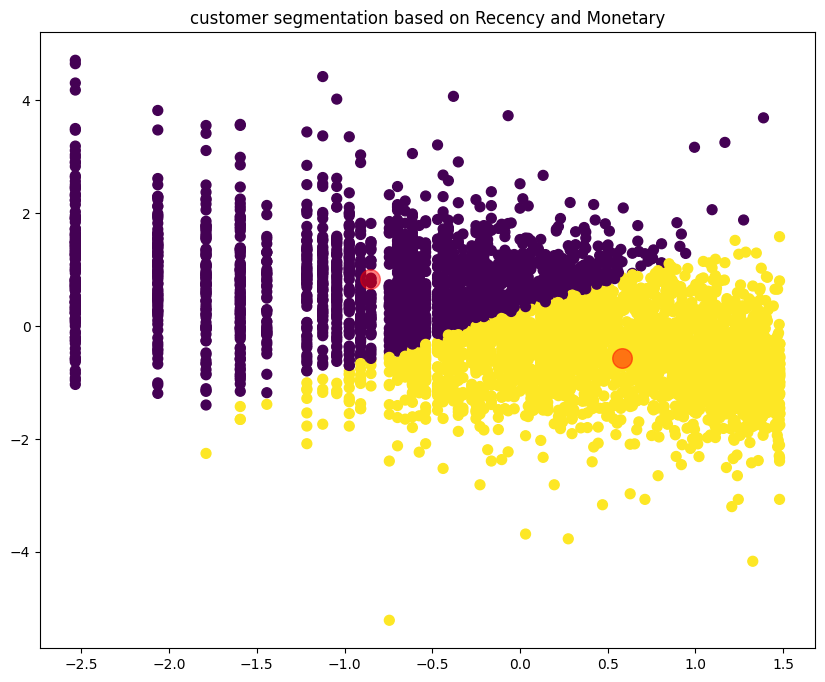

In [ ]:
plt.figure(figsize=(10,8))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***